## Pre-requisite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Zero/Zero"

/content/drive/MyDrive/Zero/Zero


## Code

In [ ]:
import os

import scipy

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm

In [ ]:
data_unprocess_agg_df_berttopics = pd.read_csv("PPT/data_unprocess_agg_df_berttopics.csv")

In [ ]:
data_unprocess_agg_df_berttopics_lda_pivot_normal = pd.read_csv("PPT/data_unprocess_agg_df_berttopics_lda_pivot_normal.csv")
data_unprocess_agg_df_berttopics_lda_pivot_normal["0"] = pd.to_datetime(data_unprocess_agg_df_berttopics_lda_pivot_normal["0"])
data_unprocess_agg_df_berttopics_lda_pivot_normal_week = data_unprocess_agg_df_berttopics_lda_pivot_normal.groupby(pd.Grouper(key="0", freq='W')).mean()
df_berttopics_pct = data_unprocess_agg_df_berttopics_lda_pivot_normal_week.pct_change().iloc[1:,:].replace([np.nan], 0).replace([np.inf], 1).replace([-np.inf], -1)

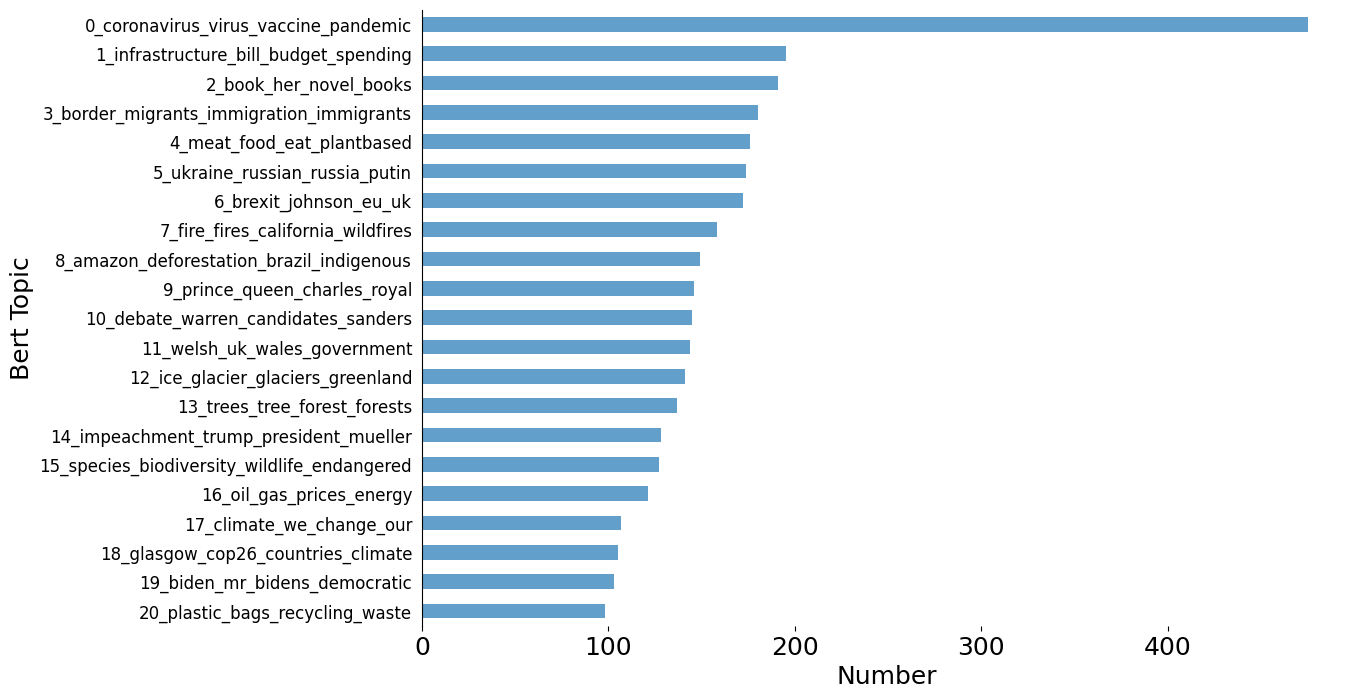

In [ ]:
from collections import Counter

fig, ax = plt.subplots(figsize=(12, 8))
data_unprocess_agg_df_berttopics_plot = pd.DataFrame(Counter(data_unprocess_agg_df_berttopics["3"]).most_common()).rename({0: "Topic", 1: "Number"}, axis=1).set_index("Topic")
data_unprocess_agg_df_berttopics_plot[::-1][-22:-1].plot(kind="barh", ax=ax, alpha=0.7)
ax.set_xlabel("Number", fontsize=18)
ax.set_ylabel("Bert Topic", fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
ax.get_legend().remove();

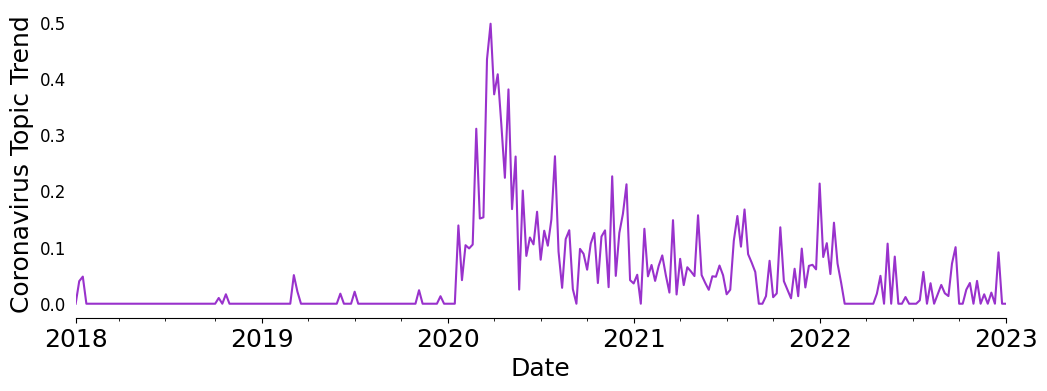

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
data_unprocess_agg_df_berttopics_lda_pivot_normal_week["0_coronavirus_virus_vaccine_pandemic"].plot(ax=ax, color="darkorchid")
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("Coronavirus Topic Trend", fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
ax.legend(prop={'size': 12})
ax.get_legend().remove();

In [ ]:

df_gts = []
for term in os.listdir("PPT/googletrends"):
  df_gts.append(pd.read_csv("PPT/googletrends/" + term, index_col=0))
df_gts = pd.concat(df_gts, axis=1)
df_gts.index = pd.to_datetime(df_gts.index)
df_gts_pct = df_gts.pct_change().iloc[1:,:].replace([np.nan], 0).replace([np.inf], 1).replace([-np.inf], -1)

In [ ]:
df_gts.corr()

,stratospheric aerosol injection,solar engineering,Marine cloud brightening,direct air capture,geoengineering,climate engineering,carbon capture and storage,bioenergy,biochar,afforestation
stratospheric aerosol injection,1.000000,0.117487,0.057373,0.001387,0.076474,0.029975,-0.030339,0.037116,0.012030,-0.009856
solar engineering,0.117487,1.000000,0.032530,0.313465,0.251678,0.412452,0.319220,0.507468,0.447000,0.491853
Marine cloud brightening,0.057373,0.032530,1.000000,0.130519,-0.011249,0.058264,0.171529,0.054601,0.202493,0.138137
direct air capture,0.001387,0.313465,0.130519,1.000000,-0.189082,0.420613,0.691103,0.116961,0.717036,0.745692
geoengineering,0.076474,0.251678,-0.011249,-0.189082,1.000000,0.226339,-0.033701,0.405162,-0.021670,-0.137666
climate engineering,0.029975,0.412452,0.058264,0.420613,0.226339,1.000000,0.373780,0.350406,0.456772,0.414457
carbon capture and storage,-0.030339,0.319220,0.171529,0.691103,-0.033701,0.373780,1.000000,0.315285,0.676569,0.633369
bioenergy,0.037116,0.507468,0.054601,0.116961,0.405162,0.350406,0.315285,1.000000,0.356382,0.291851
biochar,0.012030,0.447000,0.202493,0.717036,-0.021670,0.456772,0.676569,0.356382,1.000000,0.761544
afforestation,-0.009856,0.491853,0.138137,0.745692,-0.137666,0.414457,0.633369,0.291851,0.761544,1.000000


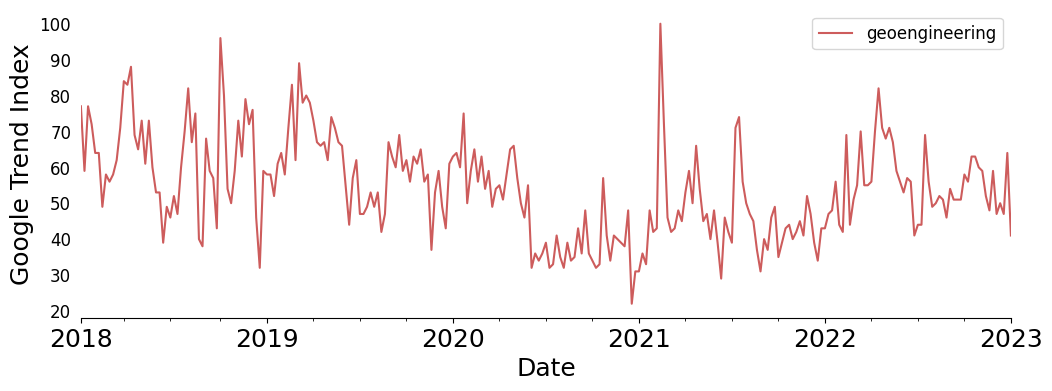

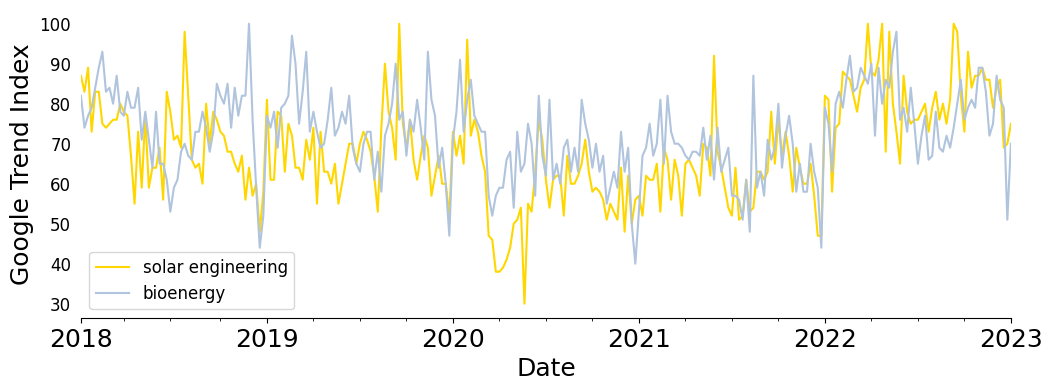

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
df_gts[["geoengineering"]].plot(ax=ax, color="indianred")
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("Google Trend Index", fontsize=18)
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("Google Trend Index", fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
ax.legend(prop={'size': 12})

fig, ax = plt.subplots(figsize=(12, 4))
df_gts[["solar engineering", "bioenergy"]].plot(ax=ax, color=["gold", "lightsteelblue"])
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("Google Trend Index", fontsize=18)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
ax.legend(prop={'size': 12});

In [ ]:
df_pearson = pd.DataFrame(0, index=df_berttopics_pct.columns, columns=df_gts_pct.columns)
df_pearson_p = pd.DataFrame(0, index=df_berttopics_pct.columns, columns=df_gts_pct.columns)
for x, topic in df_berttopics_pct.T.iterrows():
  for y, gt in df_gts_pct.T.iterrows():
    r, p = scipy.stats.pearsonr(topic, gt)
    if r >= 0.2:
      df_pearson.at[x, y] = r
      if topic.name.split("_")[0] == "73":
        df_pearson_p.at[x, y] = " Topic " + topic.name.split("_")[0] + ":  " + ",".join(topic.name.split("_")[1:-1]) + "\n" + " Beta = %.2f" % r + ''.join(['*' for t in [.05, .01, .001] if p<=t])
      else:
        df_pearson_p.at[x, y] = " Topic " + topic.name.split("_")[0] + ":  " + ",".join(topic.name.split("_")[1:]) + "\n" + " Beta = %.2f" % r + ''.join(['*' for t in [.05, .01, .001] if p<=t])
    else:
      df_pearson.at[x, y] = 0
      df_pearson_p.at[x, y] = ""

df_pearson.columns = [i.lower() for i in df_pearson.columns]
df_pearson_result = df_pearson.reindex(["geoengineering"]+ sorted([i for i in df_pearson.columns if i != "geoengineering"]), axis=1).iloc[1:]
df_pearson_result = df_pearson_result.rename({"solar engineering": "solar geoengineering"}, axis=1)
df_pearson_result = df_pearson_result.T

df_pearson_p.columns = [i.lower() for i in df_pearson_p.columns]
df_pearson_p_result = df_pearson_p.reindex(["geoengineering"]+ sorted([i for i in df_pearson_p.columns if i != "geoengineering"]), axis=1).iloc[1:]
df_pearson_p_result = df_pearson_p_result.rename({"solar engineering": "solar geoengineering"}, axis=1)
df_pearson_p_result = df_pearson_p_result.T

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


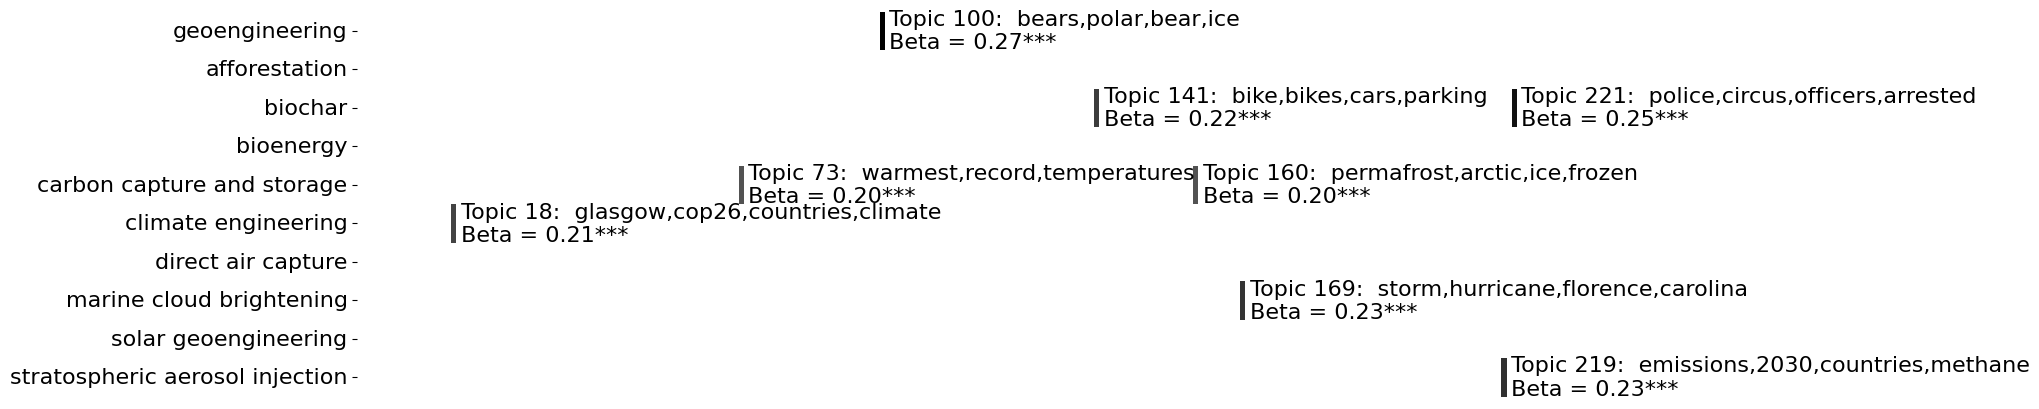

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.heatmap(df_pearson_result, cmap="Greys", annot = df_pearson_p_result, ax=ax, fmt = '', annot_kws={"ha": 'left',"va": 'center', "fontsize":16, "color": "black"}, cbar=False)
# choose_xticklabels = list(df_pearson_result.columns[(df_pearson_result >= 0.2).any(axis=0)])
# choose_xticks = [int(i.split("_")[0]) for i in choose_xticklabels]
# choose_xticklabels[2] = "\n" + choose_xticklabels[2]
# choose_xticklabels[4] = "\n" + choose_xticklabels[4]
# choose_xticklabels[5] = "\n\n" + choose_xticklabels[5]
# choose_xticklabels[-1] = "\n" + choose_xticklabels[-1]
# for index, i in enumerate(choose_xticks):
#   if index + 1 >= len(choose_xticks):
#     break
#   if choose_xticks[index+1] - i <= 2:
#     choose_xticks[index] -= 1
# ax.set_xticks(choose_xticks)
# ax.set_xticklabels(choose_xticklabels, rotation=0)
ax.set_xticks([])
ax.set_xticklabels([], rotation=0)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# ax.set_xlabel("Topics in the News", size=18)
# ax.set_ylabel("Google Trend Index", size=18);

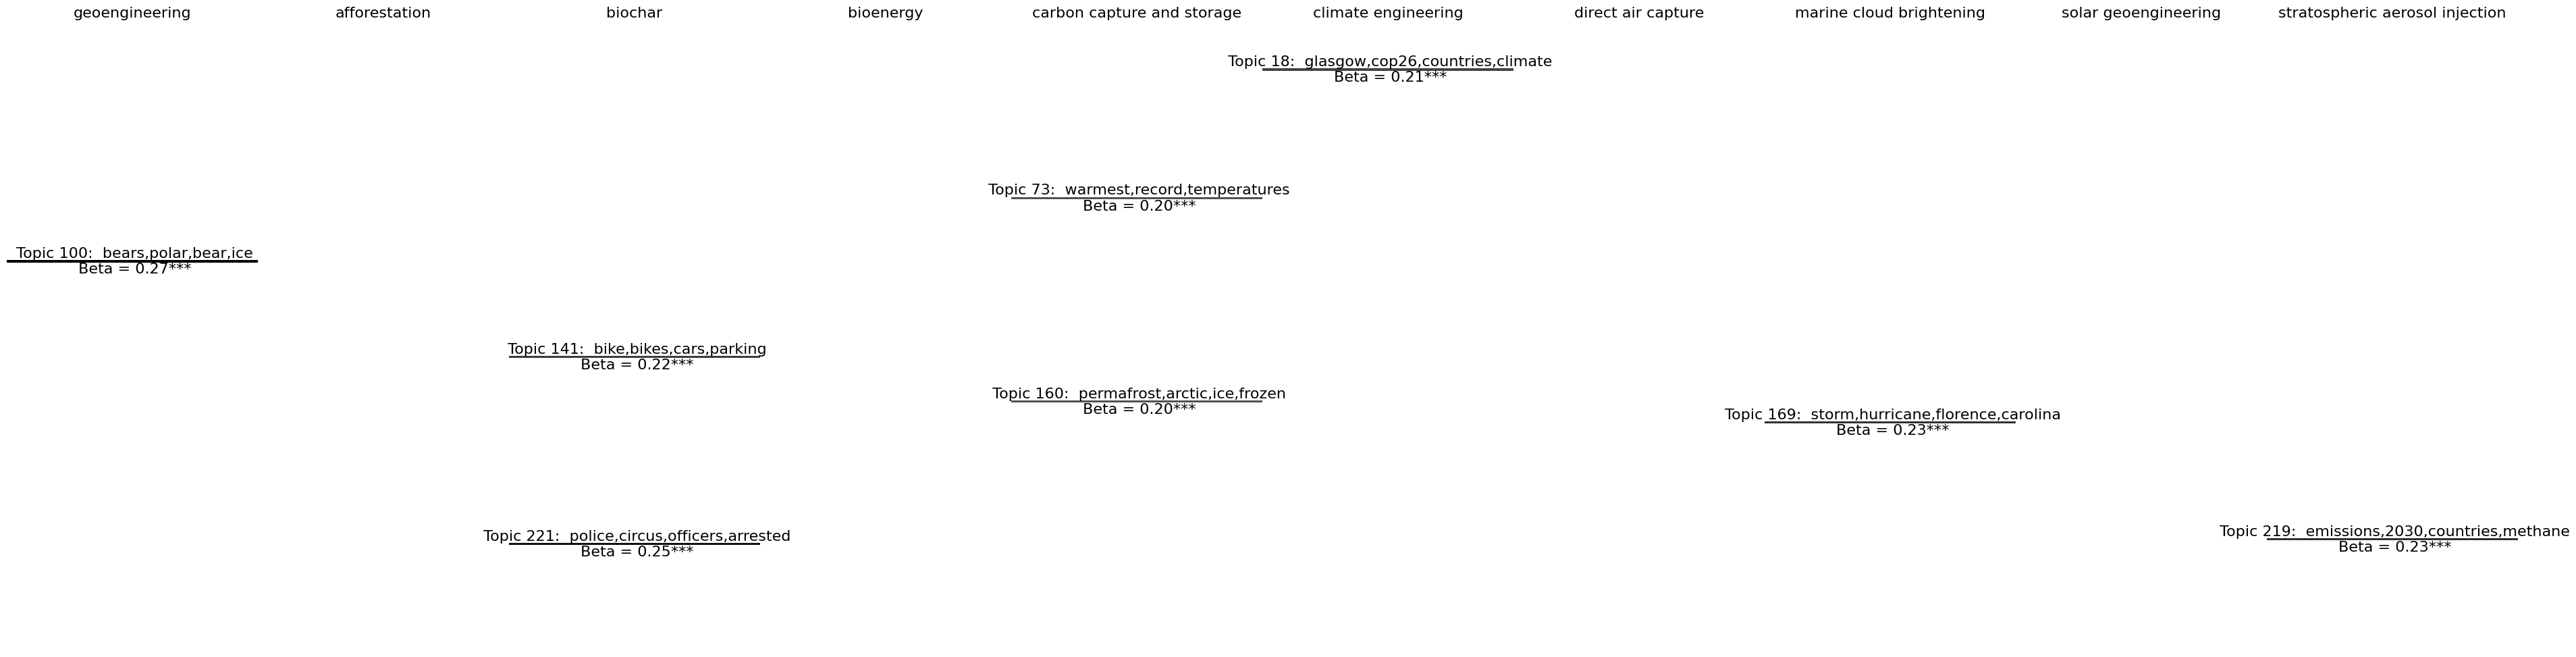

In [ ]:
fig, ax = plt.subplots(figsize=(48, 12))
sns.heatmap(df_pearson_result.T, cmap="Greys", annot = df_pearson_p_result.T, ax=ax, fmt = '', annot_kws={"ha": 'center',"va": 'center', "fontsize":16, "color": "black"}, cbar=False)
ax.set_yticks([])
ax.set_yticklabels([], rotation=0)
ax.tick_params(axis='x', which='major', labelsize=16, labelbottom = False, labeltop=True, bottom=False, top = False)
ax.tick_params(axis='y', which='major', labelsize=16);

In [ ]:
data_all_topics_label = pd.read_csv("PPT/data_all_topics_label.csv")
labels = set(data_all_topics_label["label"])

label_topic_dict = dict()
for label in labels:
  label_topic_dict[label] = list(data_all_topics_label.index[data_all_topics_label["label"] == label])

df_label = pd.DataFrame(0, index=data_unprocess_agg_df_berttopics_lda_pivot_normal_week.index, columns=label_topic_dict.keys())
for label, label_list  in label_topic_dict.items():
  df_label[label] = data_unprocess_agg_df_berttopics_lda_pivot_normal_week.iloc[:, label_topic_dict[label]].mean(axis=1)

df_label = df_label.rename({"教育": "education", "无关": "irrelevant", "政治":"politics", "艺术":"art", "宗教":"religion", "灾害": "disaster", "科技": "technology",
                            "自然": "nature", "医疗": "medical", "污染": "pollution", "社会": "society", "经济": "economy", "能源": "energy", "Geoengineering": "geoengineering"}, axis=1)
df_label = df_label[[i for i in df_label.columns if i != "irrelevant"]]
df_label_pct = df_label.pct_change().iloc[1:,:].replace([np.nan], 0).replace([np.inf], 1).replace([-np.inf], -1)

In [ ]:
df_pearson_label = pd.DataFrame(0, index=df_label_pct.columns, columns=df_gts_pct.columns)
df_pearson_label_p = pd.DataFrame(0, index=df_label_pct.columns, columns=df_gts_pct.columns)
for x, label in df_label_pct.T.iterrows():
  for y, gt in df_gts_pct.T.iterrows():
    r, p = scipy.stats.pearsonr(label, gt)
    if r >= 0:
      df_pearson_label.at[x, y] = r
      df_pearson_label_p.at[x, y] = "%.2f" % r + ''.join(['*' for t in [.05, .01, .001] if p<=t])
    else:
      df_pearson_label.at[x, y] = 0
      df_pearson_label_p.at[x, y] = ""

df_pearson_label.columns = [i.lower() for i in df_pearson_label.columns]
df_pearson_label_result = df_pearson_label.reindex(["geoengineering"]+ sorted([i for i in df_pearson_label.columns if i != "geoengineering"]), axis=1)
df_pearson_label_result.index = [i.lower() for i in df_pearson_label_result.index]
df_pearson_label_result = df_pearson_label_result.reindex(["geoengineering"]+ sorted([i for i in df_pearson_label.index if i != "geoengineering"]), axis=0)
df_pearson_label_result = df_pearson_label_result.T

df_pearson_label_p.columns = [i.lower() for i in df_pearson_label_p.columns]
df_pearson_label_p_result = df_pearson_label_p.reindex(["geoengineering"]+ sorted([i for i in df_pearson_label_p.columns if i != "geoengineering"]), axis=1)
df_pearson_label_p_result.index = [i.lower() for i in df_pearson_label_p_result.index]
df_pearson_label_p_result = df_pearson_label_p_result.reindex(["geoengineering"]+ sorted([i for i in df_pearson_label_p.index if i != "geoengineering"]), axis=0)
df_pearson_label_p_result = df_pearson_label_p_result.T

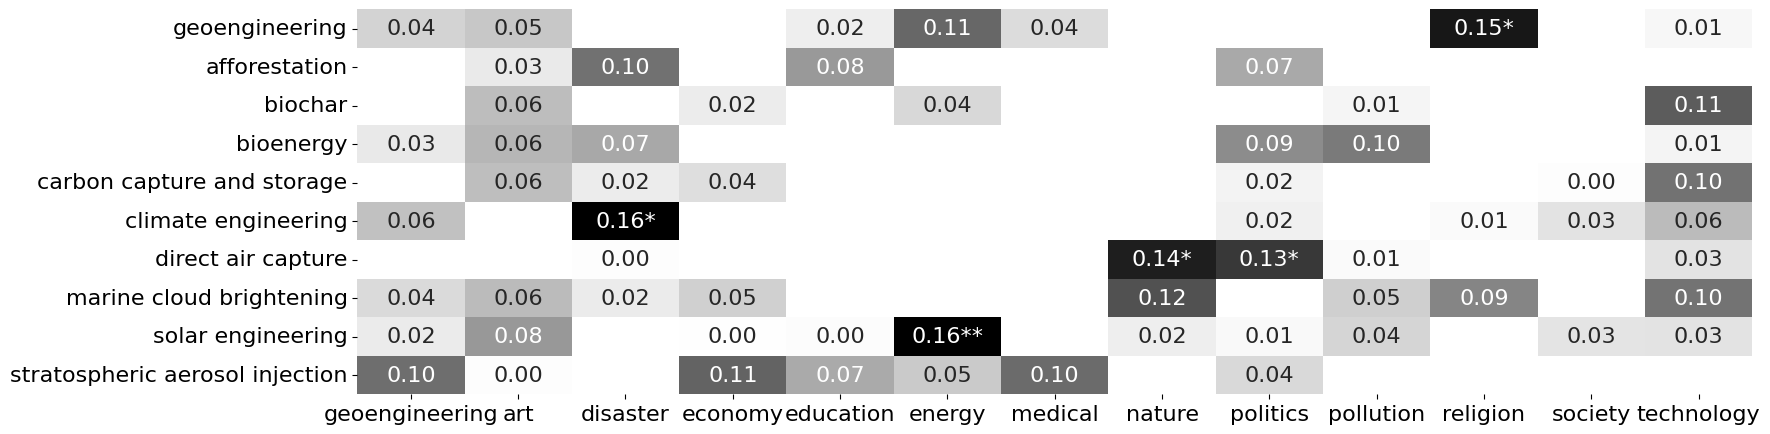

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.heatmap(df_pearson_label_result, cmap="Greys", annot = df_pearson_label_p_result, ax=ax, fmt = '', annot_kws={"fontsize":16}, cbar=False)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# ax.set_xlabel("Topics in the News", size=18)
# ax.set_ylabel("Google Trend Index", size=18);

In [ ]:
col_included = []
for col, series in df_pearson_label_p_result.items():
  if sum(series.str.contains("*", regex=False)) >= 1:
    col_included.append(col)

In [ ]:
data_unprocess_agg_df_sentiment = pd.read_csv("PPT/data_unprocess_agg_df_sentiment.csv")
data_unprocess_agg_df_sentiment["0"] = pd.to_datetime(data_unprocess_agg_df_sentiment["0"])
data_unprocess_agg_df_sentiment = data_unprocess_agg_df_sentiment.groupby(pd.Grouper(key="0", freq='W'))["3"].mean()
df_sentiment_pct = data_unprocess_agg_df_sentiment.pct_change().iloc[1:]

In [ ]:
df_pearson_sentiment = pd.DataFrame(0, index=["sentiment"], columns=df_gts_pct.columns)
df_pearson_sentiment_p = pd.DataFrame(0, index=["sentiment"], columns=df_gts_pct.columns)

for y, gt in df_gts_pct.T.iterrows():
  r, p = scipy.stats.pearsonr(df_sentiment_pct.iloc[:], gt)
  df_pearson_sentiment.at["sentiment", y] = r
  df_pearson_sentiment_p.at["sentiment", y] = str(round(r, 2)) + ''.join(['*' for t in [.05, .01, .001] if p<=t])

df_pearson_sentiment.columns = [i.lower() for i in df_pearson_sentiment.columns]
df_pearson_sentiment_result = df_pearson_sentiment.reindex(["geoengineering"]+ sorted([i for i in df_pearson_sentiment.columns if i != "geoengineering"]), axis=1)

df_pearson_sentiment_p.columns = [i.lower() for i in df_pearson_sentiment_p.columns]
df_pearson_sentiment_p_result = df_pearson_sentiment_p.reindex(["geoengineering"]+ sorted([i for i in df_pearson_sentiment_p.columns if i != "geoengineering"]), axis=1)

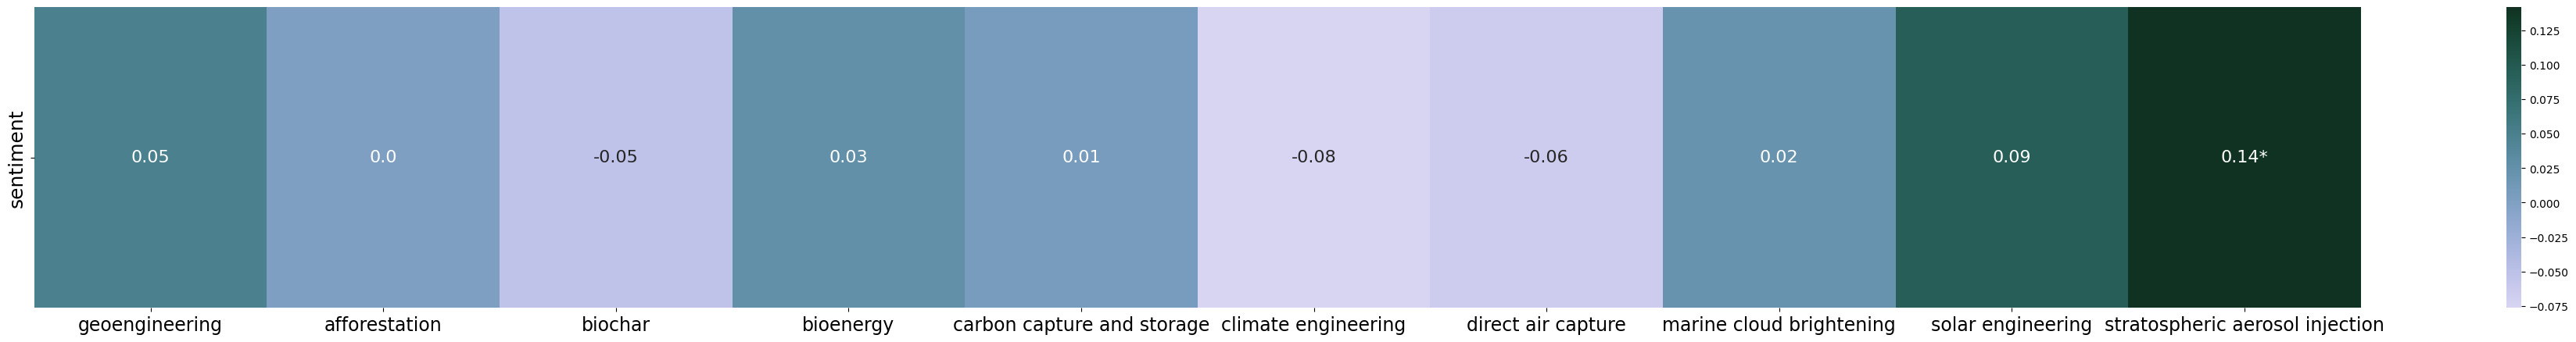

In [ ]:
fig, ax = plt.subplots(figsize=(48, 5))
sns.heatmap(df_pearson_sentiment_result, cmap=sns.cubehelix_palette(start=2, as_cmap=True), annot = df_pearson_sentiment_p_result, ax=ax, fmt = '', annot_kws={"fontsize":16})
ax.tick_params(axis='x', which='major', labelsize=17)
ax.tick_params(axis='y', which='major', labelsize=18);

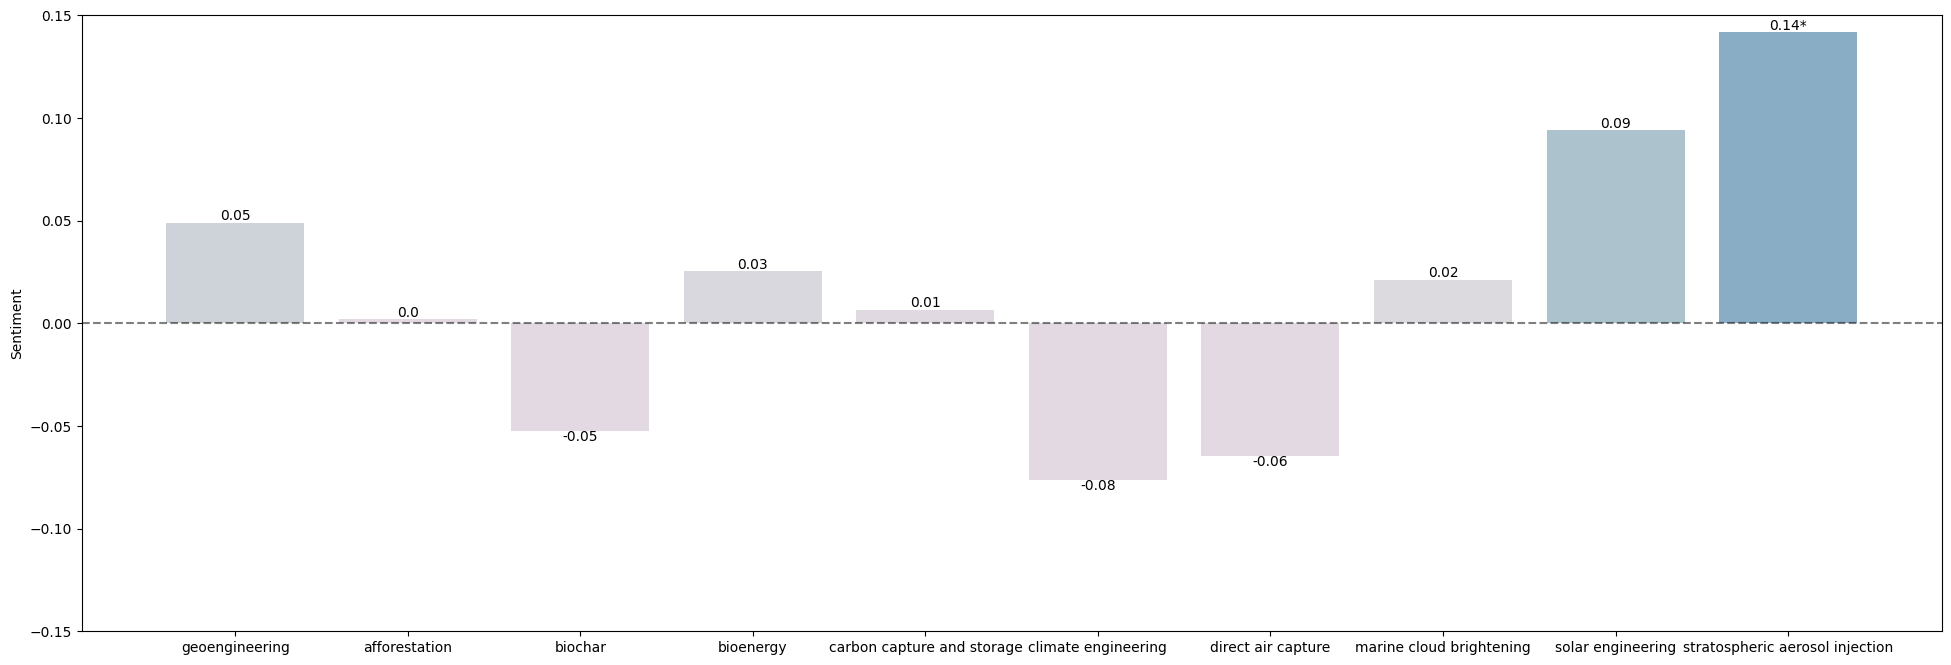

In [ ]:
fig, ax = plt.subplots(figsize=(24, 8))
my_cmap = plt.get_cmap("twilight")
ax.bar(df_pearson_sentiment_result.columns, df_pearson_sentiment_result.T["sentiment"].tolist(), color=my_cmap(df_pearson_sentiment_result.T["sentiment"].tolist()))
ax.set_ylabel("Sentiment")

rects = ax.patches
labels = df_pearson_sentiment_p_result.T["sentiment"].tolist()

for rect, label in zip(rects, labels):
  height = rect.get_height()
  if rect.get_height() < 0:
    height = height - 0.006
  ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom")

ax.axhline(y = 0, color = 'black', linestyle = '--', alpha=0.5)
ax.set_ylim(-0.15, 0.15);

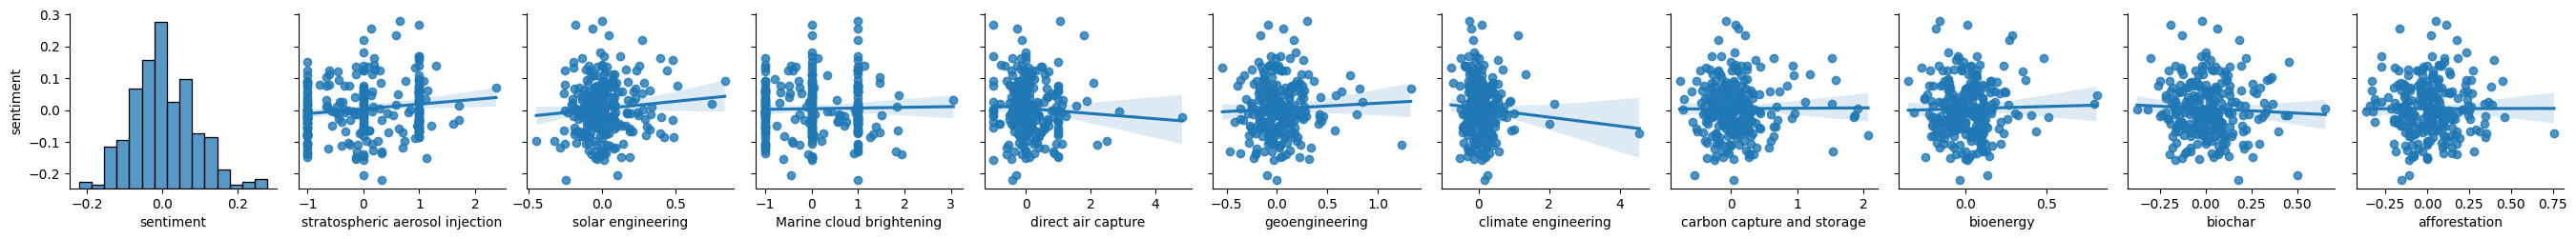

In [ ]:
data_sentiment_gts = pd.concat([data_unprocess_agg_df_sentiment, df_gts], axis=1).rename({"3": "sentiment"}, axis=1).pct_change().iloc[1:].replace([np.nan], 0).replace([np.inf], 1).replace([-np.inf], -1)
sns.pairplot(data_sentiment_gts, y_vars=["sentiment"], kind="reg");

In [ ]:
df_label_included_sentiment = pd.concat([df_label[col_included], df_gts, data_unprocess_agg_df_sentiment], axis=1).rename({"3": "sentiment"}, axis=1)
df_label_included_sentiment["category"] = df_label_included_sentiment.apply(lambda x: df_label_included_sentiment.columns[np.argmax(x[:len(col_included)])], axis=1)
df_label_included_sentiment = df_label_included_sentiment.iloc[:, len(col_included):]
df_label_included_sentiment = df_label_included_sentiment.rename({"Marine cloud brightening": "marine cloud brightening", "solar engineering": "solar geoengineering"}, axis=1)

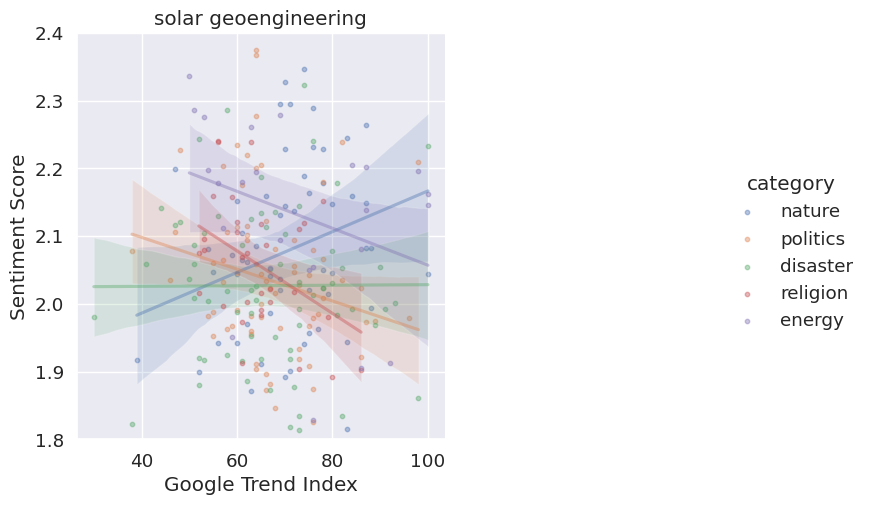

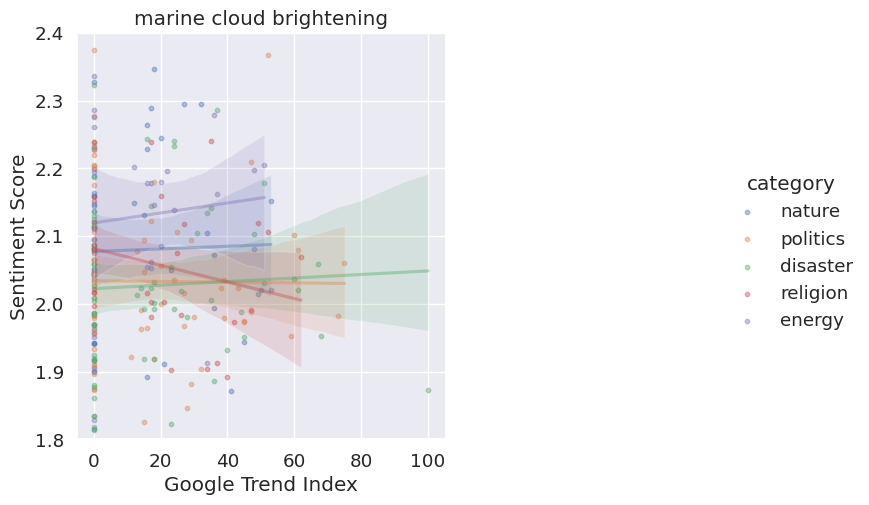

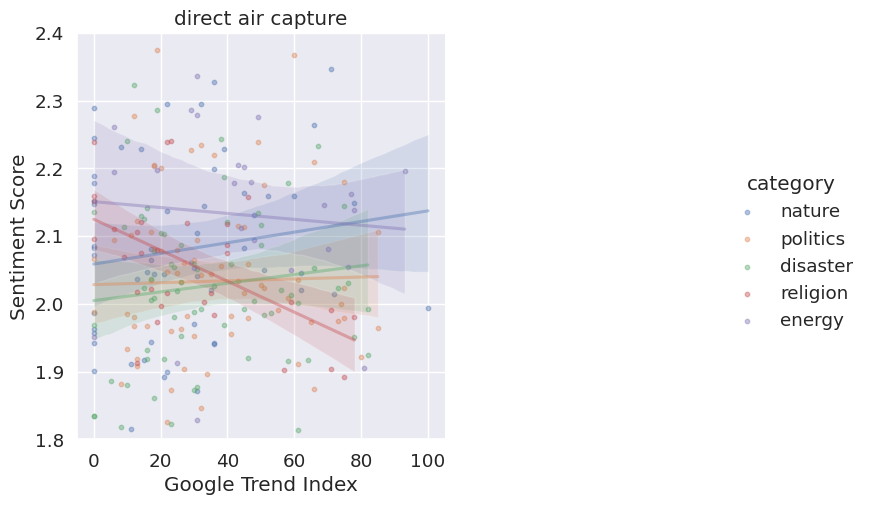

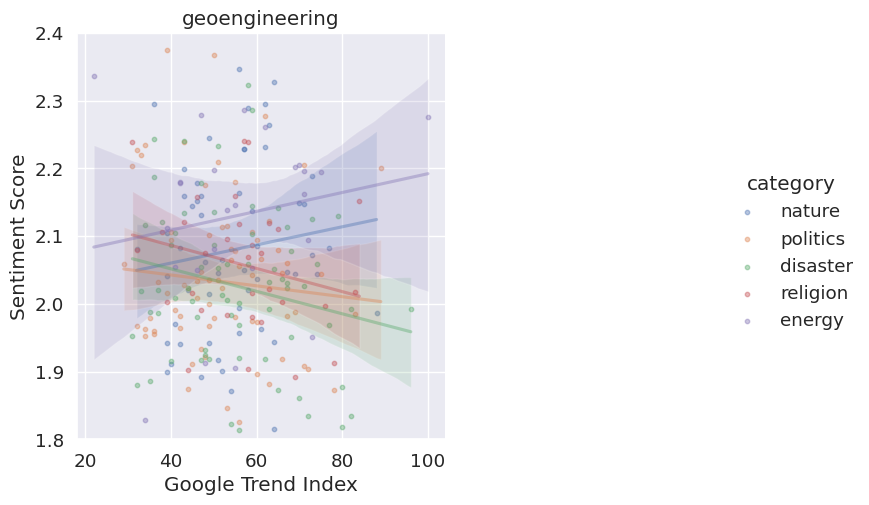

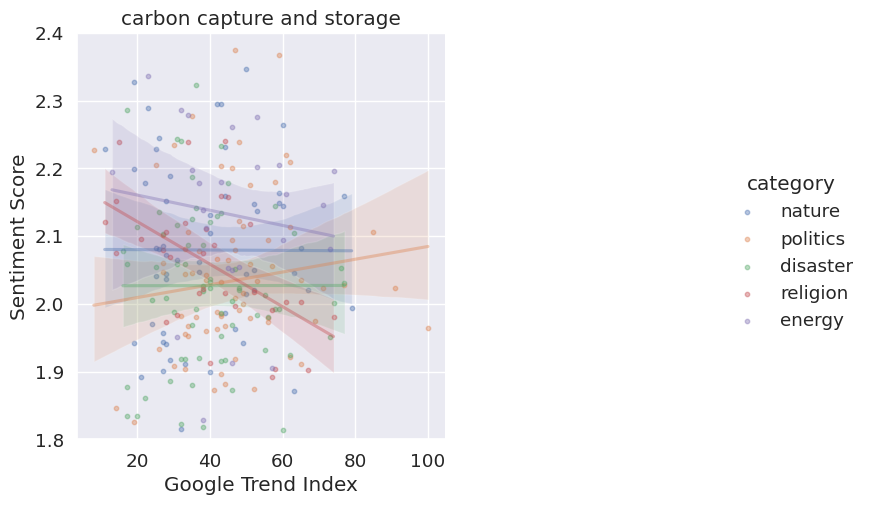

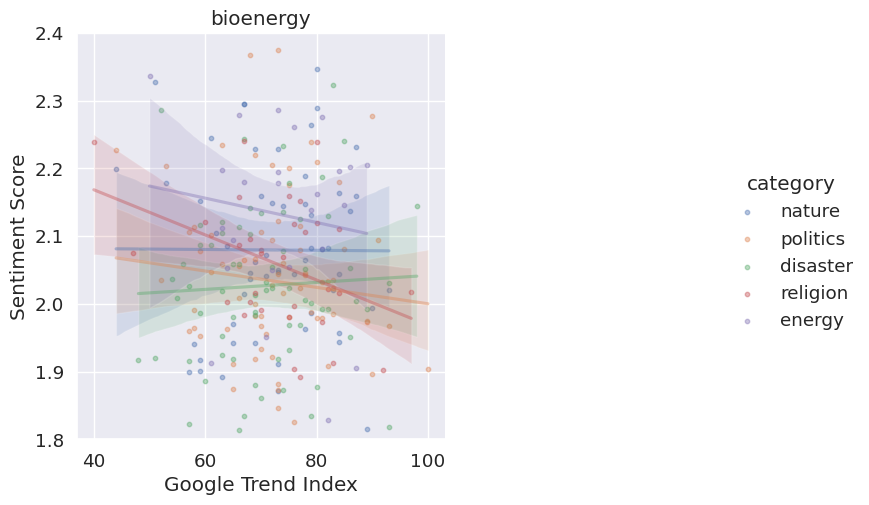

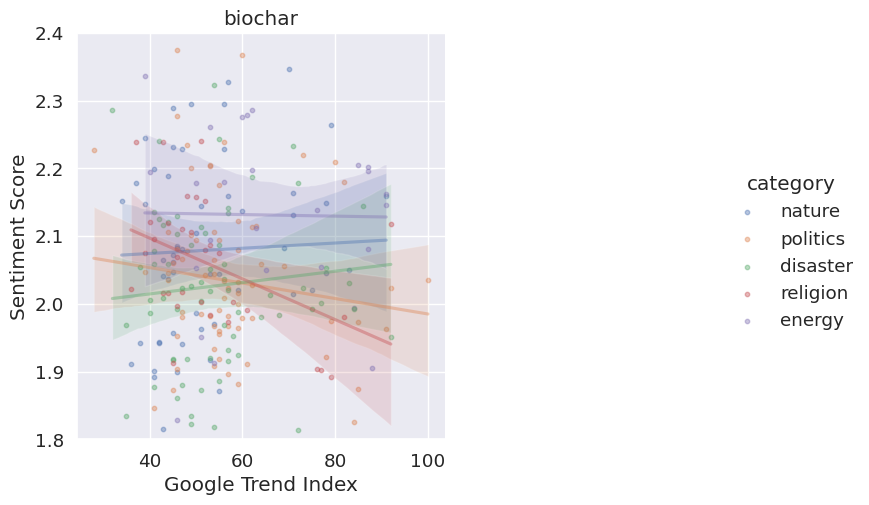

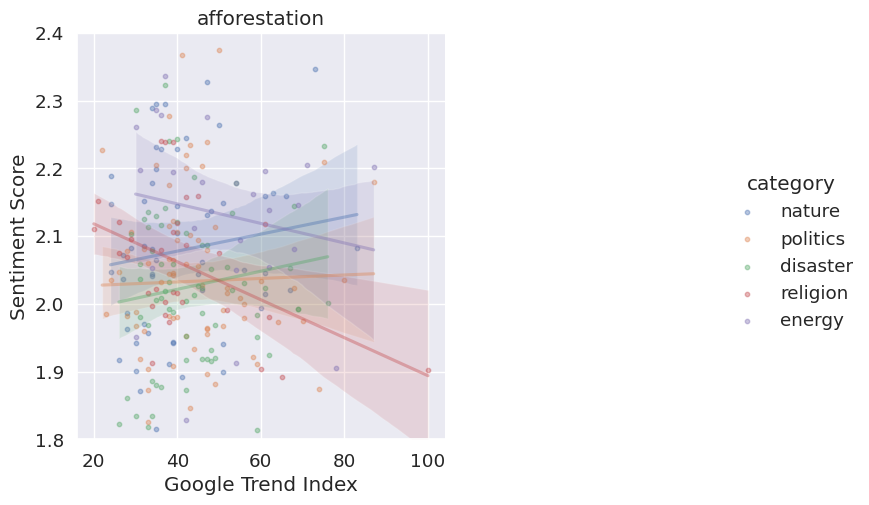

In [ ]:
sns.set(font_scale = 1.2)
for x in ['solar geoengineering', 'marine cloud brightening', 'direct air capture', 'geoengineering', 'carbon capture and storage', 'bioenergy', 'biochar', 'afforestation']:
  g = sns.pairplot(df_label_included_sentiment, hue="category", kind="reg", x_vars=x,
                  y_vars=["sentiment"], plot_kws={'line_kws':{'alpha': 0.4}, 'scatter_kws': {'alpha': 0.4, 's': 10}})
  # g._legend.remove()
  g.fig.set_size_inches(10,6)
  g.axes[0][0].set_ylim(1.8, 2.4)
  g.axes[0][0].set_title(x, y=1)
  g.axes[0][0].set_ylabel("Sentiment Score")
  g.axes[0][0].set_xlabel("Google Trend Index", y=1);

In [ ]:
for c in df_label_included_sentiment.category.unique():
  print("\n\n" + c)
  for j in sorted([i for i in df_label_included_sentiment.columns if i not in  ["sentiment", "geoengineering", "category"]]):
    df_temp = df_label_included_sentiment.loc[:, [j, "sentiment", "category"]]
    df_temp = df_temp[df_temp["category"] == c]
    stats = np.corrcoef(df_temp[j], df_temp["sentiment"])
    print(j + "%" + str(stats[0][1]))



nature
afforestation%0.10579797385021444
biochar%0.03422328283445197
bioenergy%-0.004032539006149751
carbon capture and storage%-0.0028756634826580434
climate engineering%0.17217389903913974
direct air capture%0.11847059767441732
marine cloud brightening%0.02048019994194282
solar geoengineering%0.21599155095813616
stratospheric aerosol injection%0.10025706343461721


politics
afforestation%0.026973485274236212
biochar%-0.12274892520356126
bioenergy%-0.10017786864102961
carbon capture and storage%0.12277201546744197
climate engineering%-0.006686836729516396
direct air capture%0.024812889439756035
marine cloud brightening%-0.008696355795681428
solar geoengineering%-0.2076461063034012
stratospheric aerosol injection%0.002835388252980772


disaster
afforestation%0.11977050933114834
biochar%0.08293199431028304
bioenergy%0.04124078720552376
carbon capture and storage%0.0007029851603111047
climate engineering%-0.009817627264582669
direct air capture%0.10691088748366913
marine cloud brighten

In [ ]:
for i in df_label_included_sentiment.category.unique():
  df_temp = df_label_included_sentiment.loc[df_label_included_sentiment["category"] == i, ["geoengineering", "sentiment"]]
  print(i, scipy.stats.pearsonr(df_temp["geoengineering"], df_temp["sentiment"]))

nature PearsonRResult(statistic=0.09957097214898425, pvalue=0.4530604828888987)
politics PearsonRResult(statistic=-0.0836926846195932, pvalue=0.47530132761016275)
disaster PearsonRResult(statistic=-0.18248620251405923, pvalue=0.13052726166986728)
religion PearsonRResult(statistic=-0.2362699738880637, pvalue=0.19295309828342486)
energy PearsonRResult(statistic=0.17794666793985228, pvalue=0.39476689282674055)


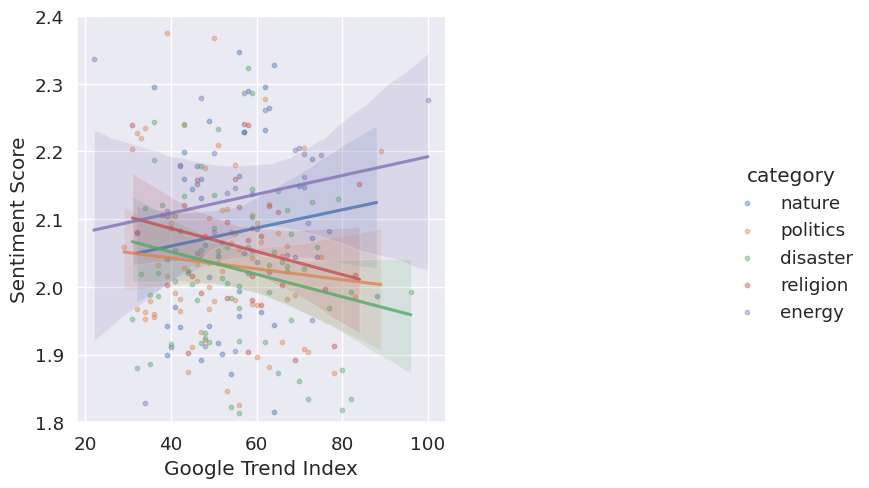

In [ ]:
sns.set(font_scale = 1.2)
for x in ['geoengineering']:
  g = sns.pairplot(df_label_included_sentiment, hue="category", kind="reg", x_vars=x,
                  y_vars=["sentiment"], plot_kws={'line_kws':{'alpha': 0.8}, 'scatter_kws': {'alpha': 0.4, 's': 10}})
  # g._legend.remove()
  g.fig.set_size_inches(10,6)
  g.axes[0][0].set_ylim(1.8, 2.4)
  g.axes[0][0].set_title(x, y=1)
  g.axes[0][0].set_title("")
  g.axes[0][0].set_ylabel("Sentiment Score")
  g.axes[0][0].set_xlabel("Google Trend Index", y=1);

In [ ]:
df_all = pd.concat([df_label, df_gts.mean(axis=1).rename("Geoengineering Index"), data_unprocess_agg_df_sentiment], axis=1).rename({"3": "sentiment"}, axis=1)
just_dummies = pd.get_dummies(df_all.index.month)
just_dummies.columns = "January, February, March, April, May, June, July, August, September, October, November, December".split(", ")
just_dummies.index = df_all.index
df_all_dummies = pd.concat([df_all, just_dummies], axis=1)

In [ ]:
Y = df_all_dummies['Geoengineering Index']
x_col = col_included
X = df_all_dummies.drop(['Geoengineering Index', 'sentiment'], axis=1)[x_col]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Geoengineering Index   R-squared:                       0.154
Model:                              OLS   Adj. R-squared:                  0.137
Method:                   Least Squares   F-statistic:                     9.278
Date:                  Wed, 10 Apr 2024   Prob (F-statistic):           3.93e-08
Time:                          14:50:56   Log-Likelihood:                -906.68
No. Observations:                   261   AIC:                             1825.
Df Residuals:                       255   BIC:                             1847.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5690      2.674

In [ ]:
Y = df_all_dummies['Geoengineering Index']
x_col = col_included + list(just_dummies.columns)
X = df_all_dummies.drop(['Geoengineering Index', 'sentiment'], axis=1)[x_col[:-1]]
X = sm.add_constant(X)
model = sm.OLS(Y,X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Geoengineering Index   R-squared:                       0.234
Model:                              OLS   Adj. R-squared:                  0.184
Method:                   Least Squares   F-statistic:                     4.663
Date:                  Wed, 10 Apr 2024   Prob (F-statistic):           3.44e-08
Time:                          14:56:02   Log-Likelihood:                -893.67
No. Observations:                   261   AIC:                             1821.
Df Residuals:                       244   BIC:                             1882.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1196      3.102

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[42.554705342388225,
 1.9560766054867686,
 1.226100470600458,
 1.2869879223828498,
 1.5756478629772566,
 1.0754011656578415,
 1.9066873896023229,
 1.772788619985672,
 1.8830599438302678,
 1.8327481882284704,
 1.8858858762267796,
 1.8118805759961982,
 1.959960196539105,
 2.0515768160891867,
 1.9863879621910219,
 1.8950846681868614,
 1.8881548084194992]

In [ ]:
data_sentiment = pd.read_csv("PPT/data_unprocess_agg_df_sentiment.csv")
label_name_dict = data_all_topics_label[["label", "Name"]].set_index("Name").to_dict()['label']
chinese_english_dcit = {"教育": "education", "无关": "irrelevant", "政治":"politics", "艺术":"art", "宗教":"religion", "灾害": "disaster", "科技": "technology",
                            "自然": "nature", "医疗": "medical", "污染": "pollution", "社会": "society", "经济": "economy", "能源": "energy", "Geoengineering": "geoengineering"}
data_unprocess_agg_df_berttopics["label"] = data_unprocess_agg_df_berttopics["3"].map(label_name_dict).map(chinese_english_dcit)
data_unprocess_agg_df_berttopics["sentiment"] = data_sentiment["3"]

In [ ]:
dfs = []
for label, df in data_unprocess_agg_df_berttopics.groupby(["label"]):
  label = label[0]
  df["0"] = pd.to_datetime(df["0"])
  df = df.rename({"sentiment": label}, axis=1).groupby(pd.Grouper(key="0", freq='D'))[label].mean()
  dfs.append(df)
df_sentiment_for_each_category = pd.concat(dfs, axis=1).fillna(0).reset_index().groupby(pd.Grouper(key="0", freq='W')).mean()

In [ ]:
df_all_sentiment_for_each_category = pd.concat([df_gts.mean(axis=1).rename("Geoengineering Index"), df_sentiment_for_each_category], axis=1)
just_dummies = pd.get_dummies(df_all.index.month)
just_dummies.columns = "January, February, March, April, May, June, July, August, September, October, November, December".split(", ")
just_dummies.index = df_all.index
df_all_sentiment_for_each_category_dummies = pd.concat([df_all_sentiment_for_each_category, just_dummies], axis=1)

In [ ]:
Y = df_all_sentiment_for_each_category_dummies['Geoengineering Index']
x_col = col_included
X = df_all_sentiment_for_each_category_dummies.drop(['Geoengineering Index'], axis=1)[x_col]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Geoengineering Index   R-squared:                       0.196
Model:                              OLS   Adj. R-squared:                  0.180
Method:                   Least Squares   F-statistic:                     12.42
Date:                  Wed, 10 Apr 2024   Prob (F-statistic):           8.61e-11
Time:                          14:29:56   Log-Likelihood:                -900.05
No. Observations:                   261   AIC:                             1812.
Df Residuals:                       255   BIC:                             1833.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1888      1.904

In [ ]:
Y = df_all_sentiment_for_each_category_dummies['Geoengineering Index']
x_col = col_included + list(just_dummies.columns)
X = df_all_sentiment_for_each_category_dummies.drop(['Geoengineering Index'], axis=1)[x_col[:-1]]
X = sm.add_constant(X)
model = sm.OLS(Y,X.astype(float))
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Geoengineering Index   R-squared:                       0.289
Model:                              OLS   Adj. R-squared:                  0.243
Method:                   Least Squares   F-statistic:                     6.204
Date:                  Wed, 10 Apr 2024   Prob (F-statistic):           1.61e-11
Time:                          14:56:10   Log-Likelihood:                -883.94
No. Observations:                   261   AIC:                             1802.
Df Residuals:                       244   BIC:                             1862.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3940      2.550

In [ ]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[30.981069325810374,
 1.284329403766305,
 1.1411998178043072,
 1.2215580358032532,
 1.1609776388160165,
 1.0639463736548698,
 1.9248586822913416,
 1.7994267050119843,
 1.9518637208304208,
 1.85712121733611,
 1.9285079595168646,
 1.8348625008081996,
 1.886410477253915,
 1.9128969576669486,
 1.8913495292748226,
 1.85517202040384,
 1.8669172418950826]

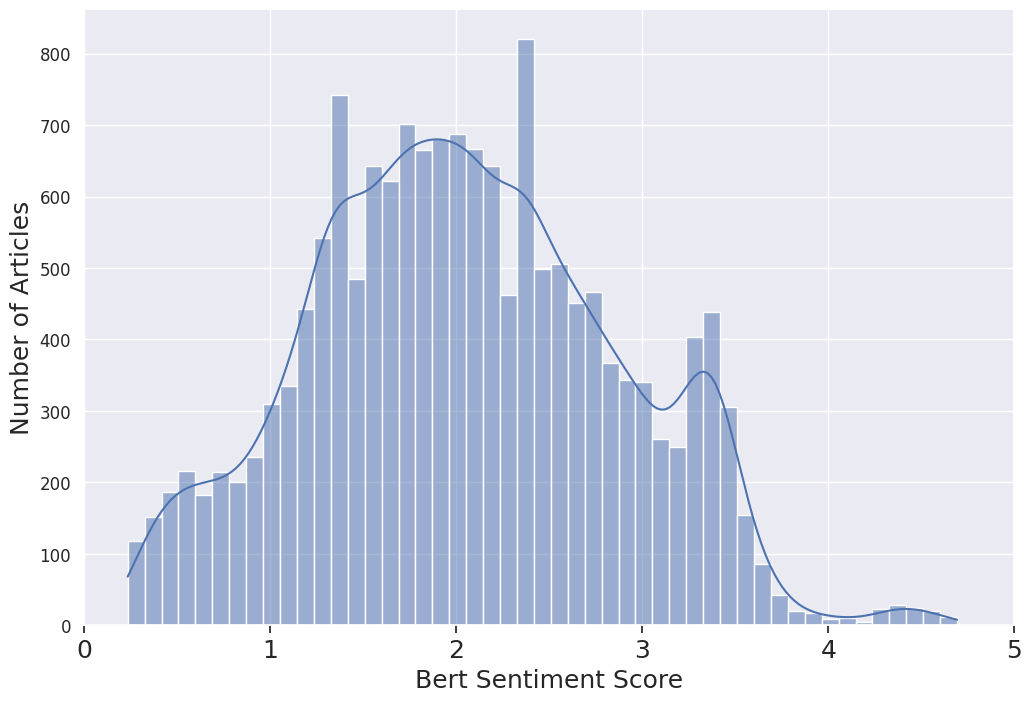

In [ ]:
from collections import Counter

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(data=data_sentiment, x="3", kde=True)
ax.set_ylabel("Number of Articles", fontsize=18)
ax.set_xlabel("Bert Sentiment Score", fontsize=18)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True);

In [ ]:
# df_all_sentiment_for_each_category.to_csv("df_all_sentiment_for_each_category.csv")